<a href="https://colab.research.google.com/github/dhritimanchanda/IBM_Employee_attrition/blob/main/ISBA_IBM_Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program predicts employee attrition

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [5]:
#Store the data into a data frame
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

#Print the first 7 rows of data
df.head(7)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [6]:
#Get the number of rows and cols
df.shape

(1470, 35)

In [7]:
#Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Get a count of the empty values for each column
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Check for any missing / null values in the data
df.isnull().values.any()

False

In [10]:
#View some statistics/ univariate analysis
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#Get a count of the number of employees that stay and left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object


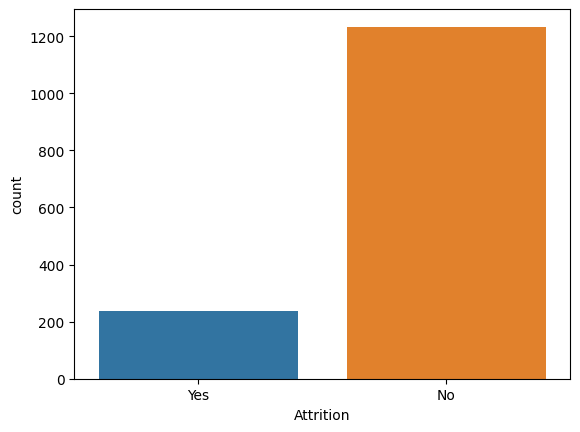

In [13]:
#Exploratory Data Analysis
#Visualize the number of employees that stayed and left the company

import matplotlib.pyplot as plt
print(df['Attrition'])
sns.countplot(x=df['Attrition'])
plt.show()

In [14]:
# This is the percentage if we just guessed no for attriton
(1470 - 237)/1470

0.8387755102040816

In [15]:
# Attrition Target Variable Distribution
attrition_freq = df[['Attrition']].apply(lambda x: x.value_counts())
attrition_freq['frequency_percent'] = round((100 * attrition_freq / attrition_freq.sum()),2)

print(attrition_freq)


     Attrition  frequency_percent
No        1233              83.88
Yes        237              16.12


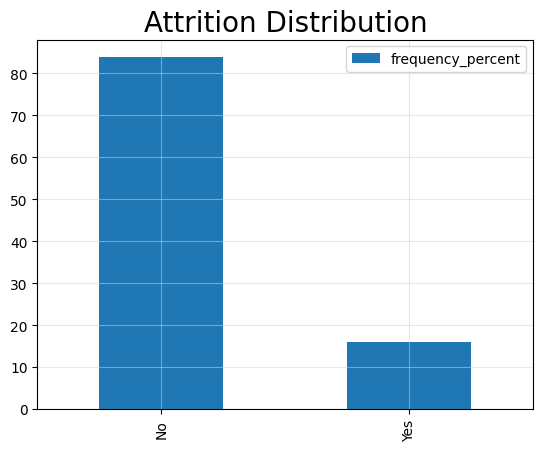

In [16]:
# Attrition distribution bar plot
plot = attrition_freq[['frequency_percent']].plot(kind="bar");
plot.set_title("Attrition Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

<Axes: xlabel='Age', ylabel='count'>

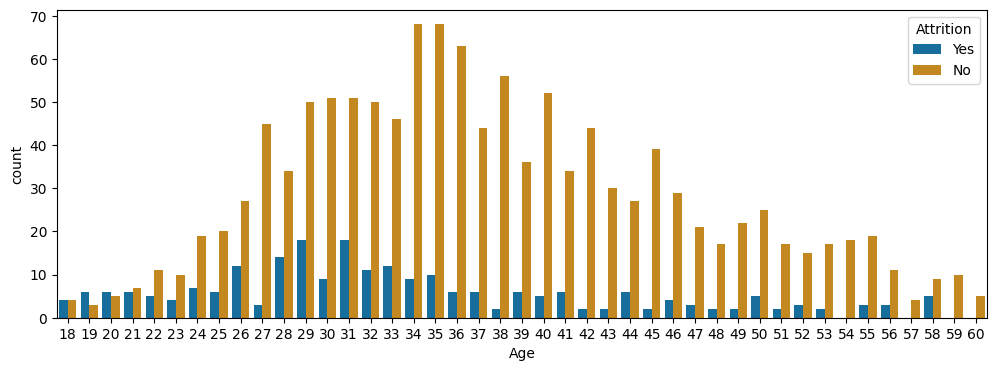

In [17]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data= df, palette = 'colorblind')

In [18]:
#Print all of the data types and their unique values
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ':'+ str(df[column].unique()))
    print(df[column].value_counts())
    print('__________________________________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
__________________________________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
__________________________________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: i

In [19]:
df['StandardHours'].unique()

array([80])

In [20]:
df['EmployeeCount'].unique()

array([1])

In [21]:
#Remove some useless columns
df = df.drop('Over18' , axis = 1)
df = df.drop('EmployeeNumber' , axis = 1)
df = df.drop('StandardHours' , axis = 1)
df = df.drop('EmployeeCount' , axis = 1)

In [22]:
df.shape


(1470, 31)

In [23]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [24]:
#Categorical Features
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [25]:
len(object_col)

7

In [26]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [27]:
#Numerical Features a. categorize in numerical format (discountinous)
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education : [2 1 4 3 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 2 4 1]
JobLevel : [2 1 3 4 5]
JobSatisfaction : [4 2 3 1]
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating : [3 4]
RelationshipSatisfaction : [1 4 2 3]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [0 3 2 5 1 4 6]
WorkLifeBalance : [1 3 2 4]
YearsInCurrentRole : [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion : [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager : [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


In [28]:
#Numerical Features a. categorize in numerical format (continuos)
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [29]:
print(disc_col)

['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [30]:
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

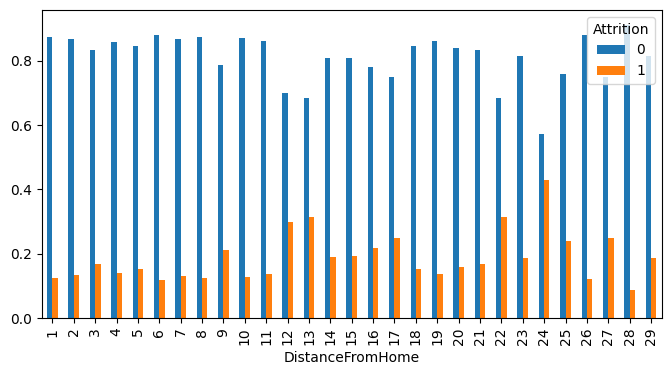

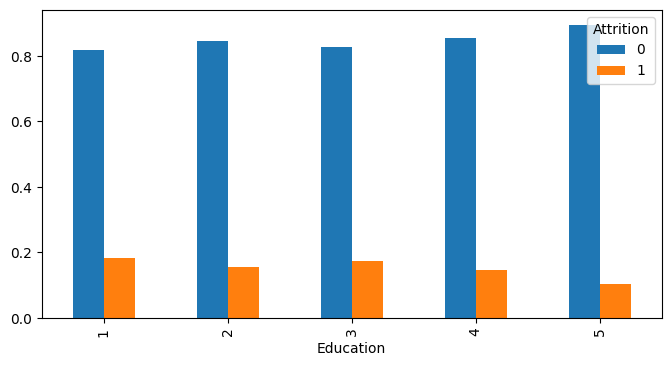

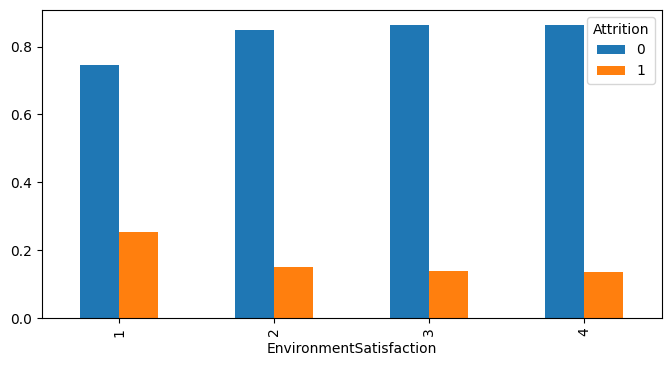

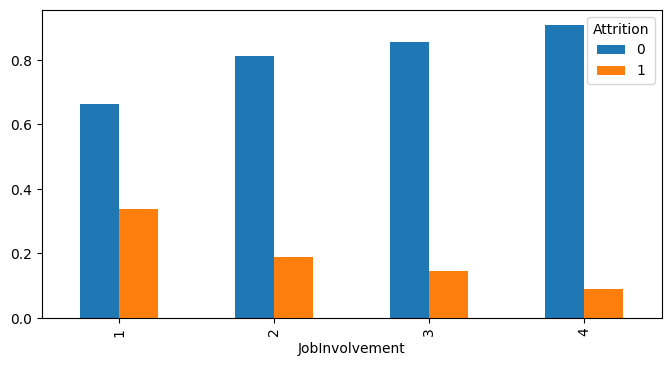

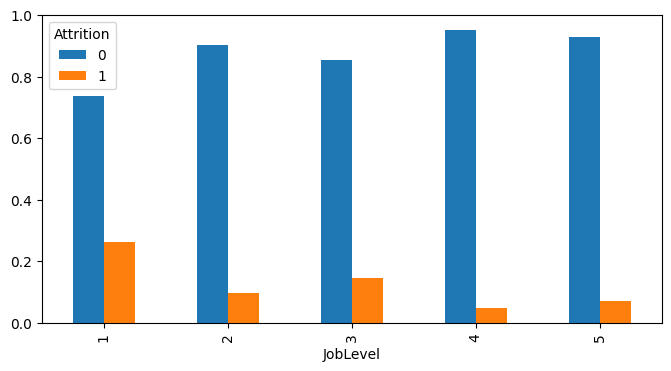

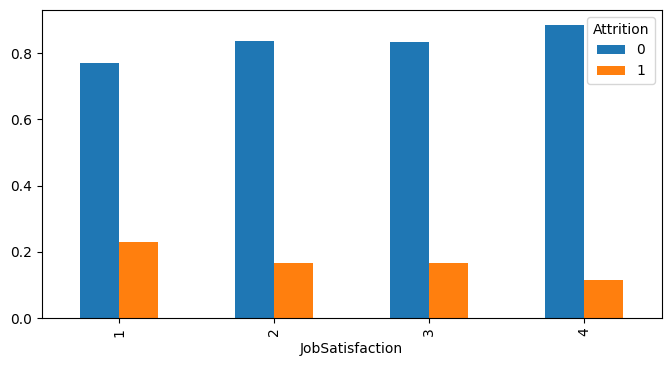

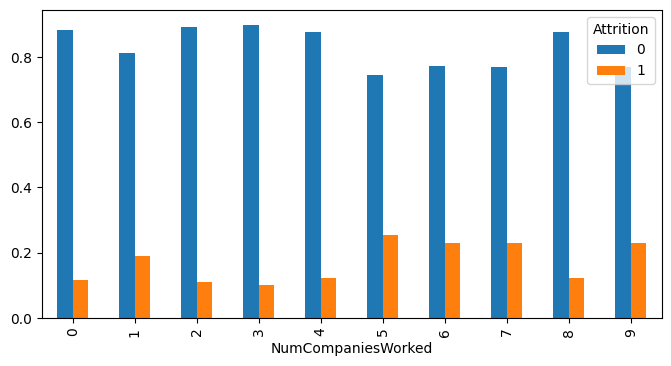

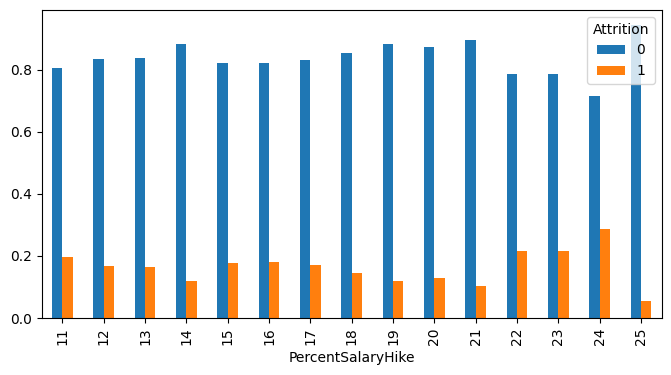

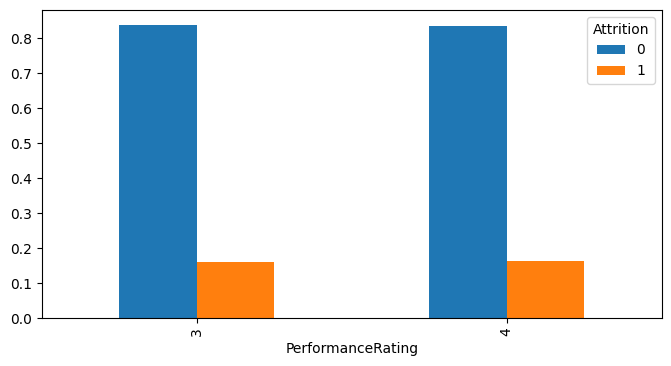

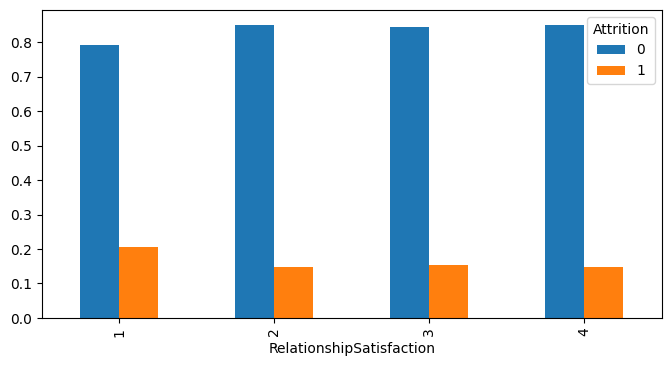

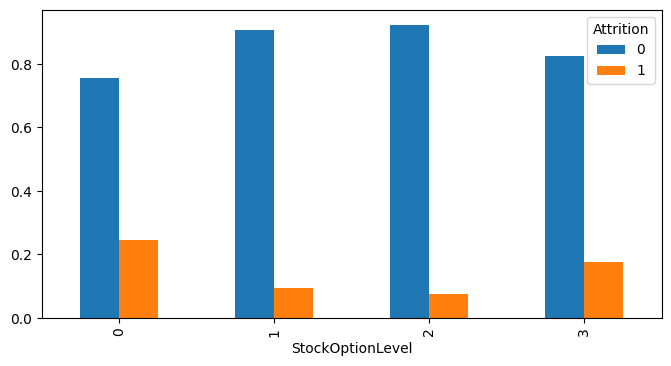

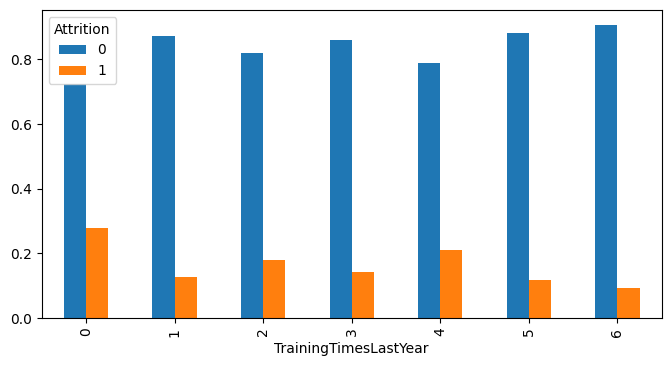

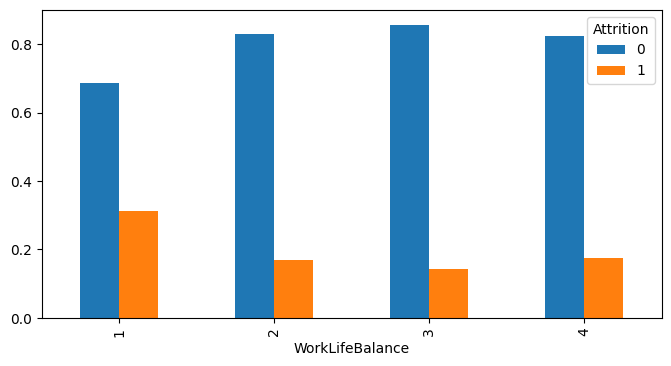

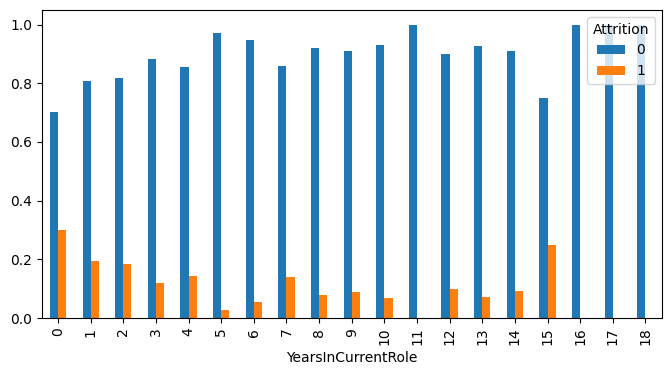

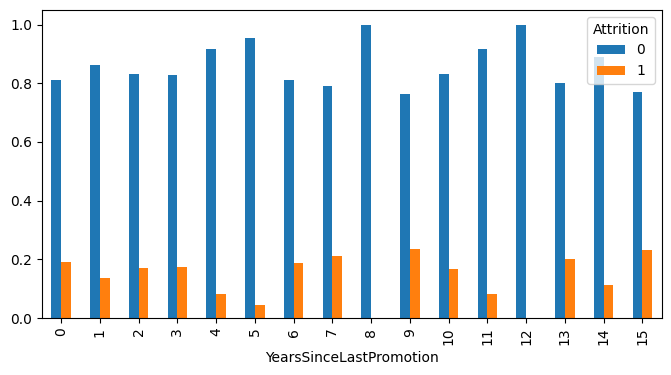

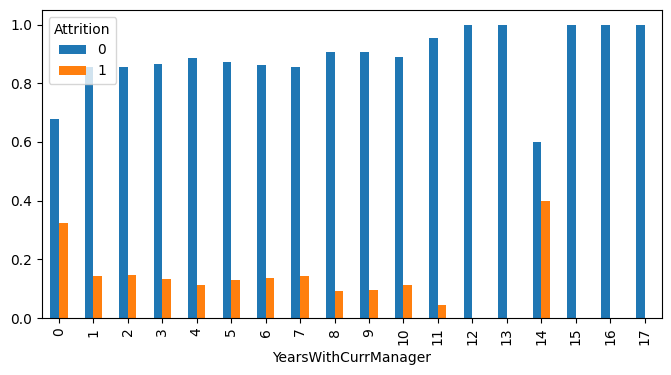

In [31]:
for col in disc_col:
    Bar_plots(col)

<Axes: xlabel='Age', ylabel='Density'>

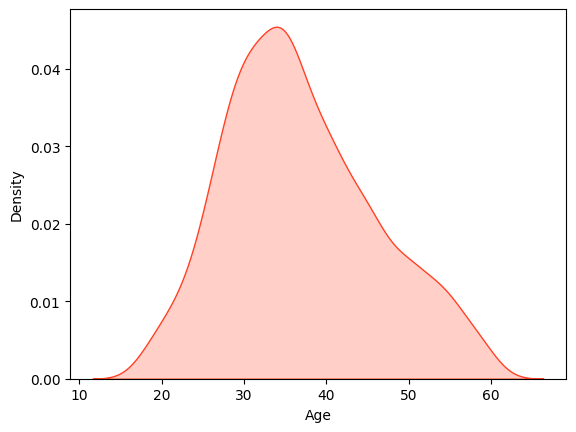

In [32]:
#analysing numerical features
sns.kdeplot(df['Age'],shade=True,color='#ff4125')


<Axes: xlabel='Age', ylabel='Density'>

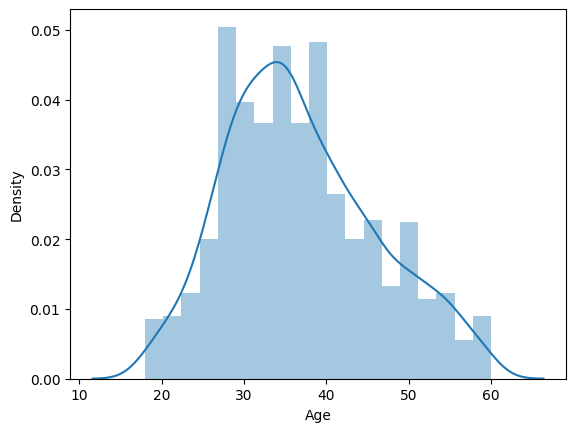

In [33]:
sns.distplot(df['Age'])


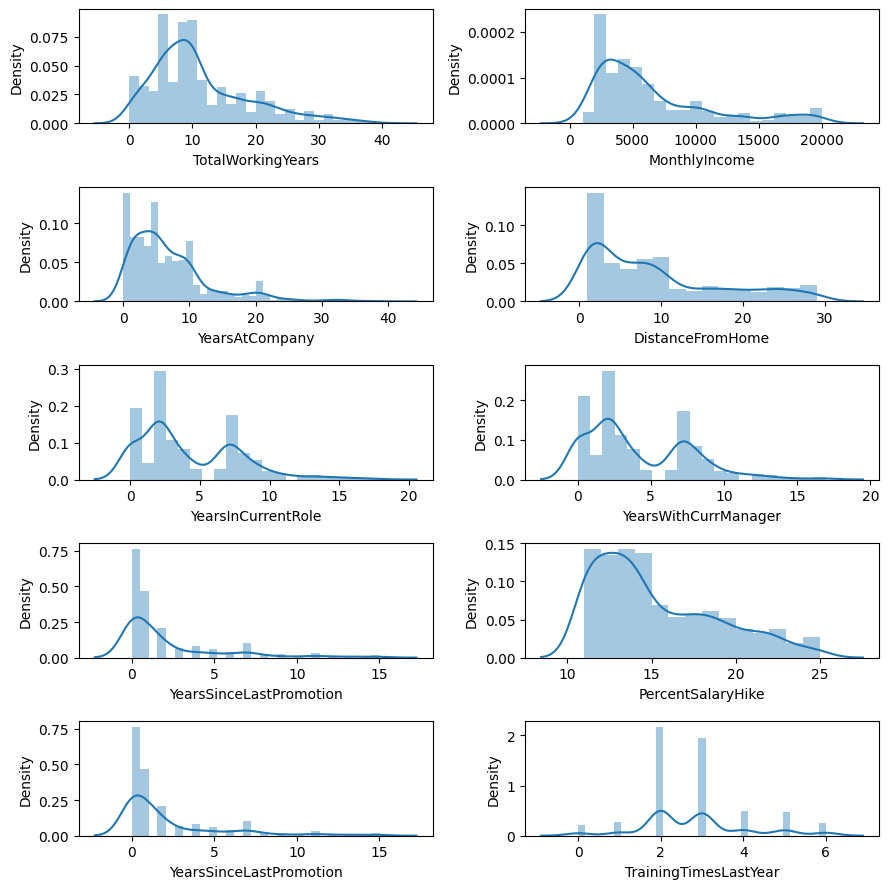

In [34]:

fig,ax = plt.subplots(5,2, figsize=(9,9))
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0])
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0])
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])
plt.tight_layout()
plt.show()

In [35]:
#Get the correrlation
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<Axes: >

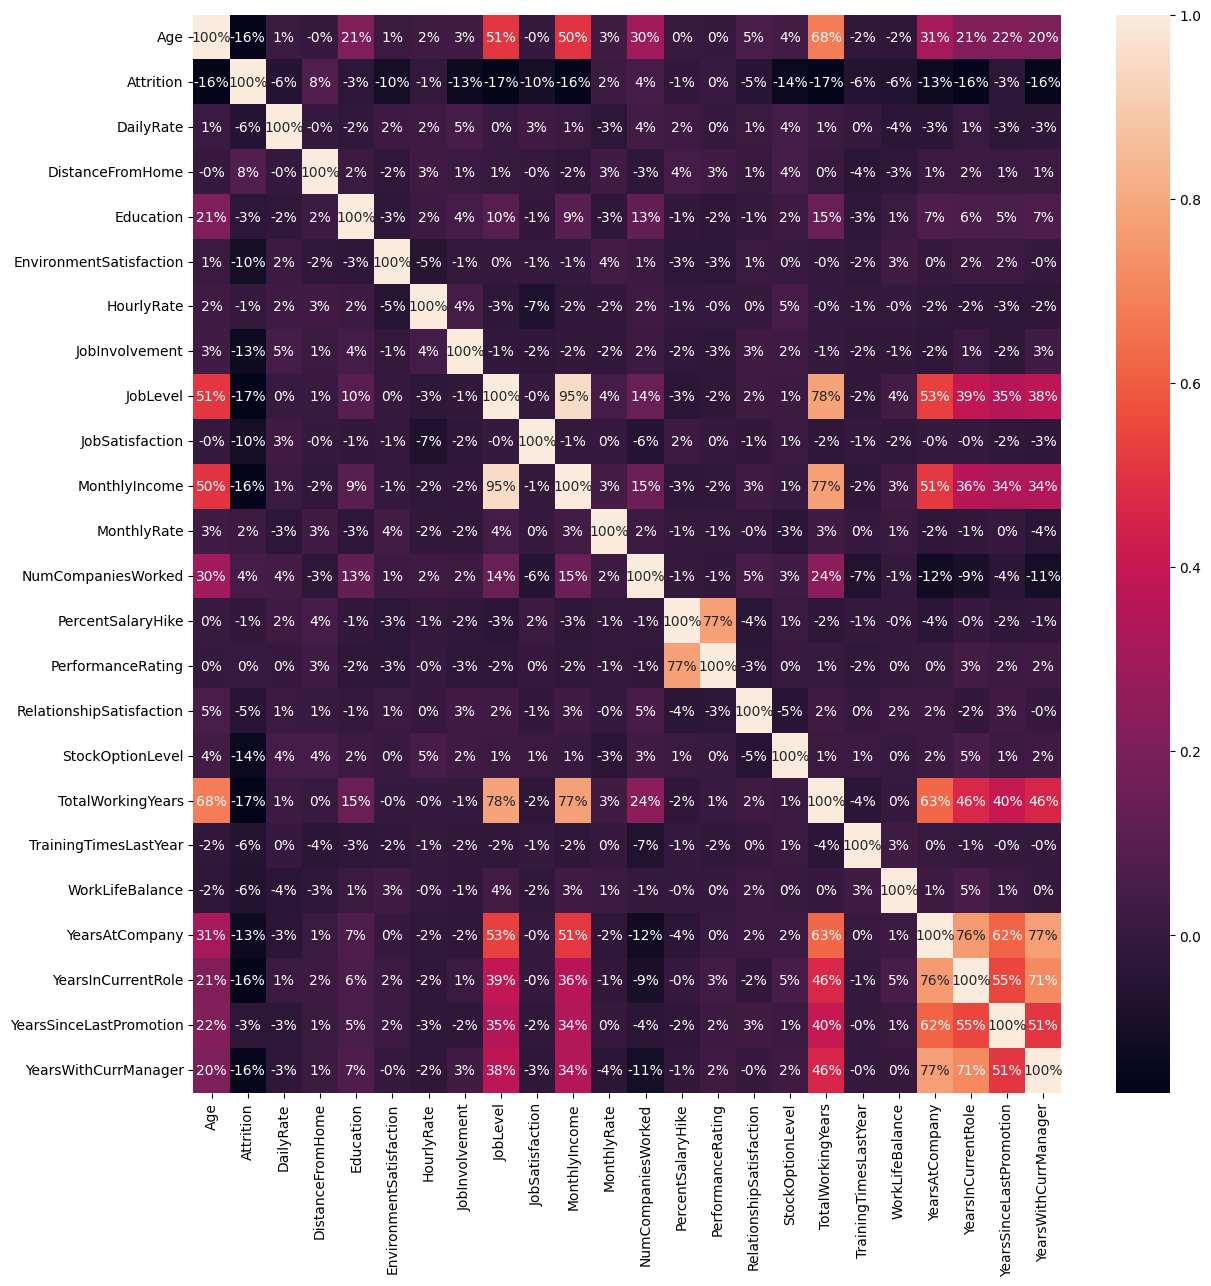

In [36]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [37]:
#Transform the data
#Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [38]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [39]:
#Create a new column
df['Age_Years'] = df['Age']


In [40]:
#Drop the age column
df=df.drop('Age' , axis = 1)

In [41]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [42]:
#Show the data frame
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,41
1,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,49
2,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,37
3,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,33
4,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,36
1466,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,39
1467,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,27
1468,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,49


In [43]:
numerical_df=df.select_dtypes(include=np.number)
categorical_df=df.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

In [44]:
from decorator import DEF
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569
Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
0                       0.757576  
1                       0.242424  
Gender       Female      Male
Attrition    

In [45]:
  categorical_df_dummies=pd.get_dummies(df[categorical_cols],drop_first=True)
  print(categorical_df_dummies)

      BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             1   
3                                    1                             0   
4                                    0                             1   
...                                ...                           ...   
1465                                 1                             0   
1466                                 0                             1   
1467                                 0                             1   
1468                                 1                             0   
1469                                 0                             1   

      Department_Research & Development  Department_Sales  \
0                                     0                 1   
1            

In [46]:
  final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)

In [47]:
final_df.head()


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,0,1,0,1,1,0,0,0,0,0,...,1,0,8,0,1,6,4,0,5,41
1,1,0,1,0,1,0,0,0,0,1,...,4,1,10,3,3,10,7,1,7,49
2,0,1,1,0,0,0,0,1,0,1,...,2,0,7,3,3,0,0,0,0,37
3,1,0,1,0,1,0,0,0,0,0,...,3,0,8,3,3,8,7,3,0,33
4,0,1,1,0,0,0,1,0,0,1,...,4,1,6,3,3,2,2,2,2,27


In [48]:
Y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

In [49]:
#Splitting Data in Train and Test Set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix, precision_score, confusion_matrix
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [50]:
#Building base model (Predicting that no employee leaves the company)
base=np.zeros(1470)
print(accuracy_score(base,df.Attrition))

0.8387755102040816


In [51]:
#Method that applies model on the data and Predict the attrition
def model(mod,model_name,x_tr,y_tr,x_tes,y_tes):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("     ", model_name,"      ")
    print("Accuracy ", accuracy_score(pred_dt,y_tes))
    print("ROC_AUC  ", roc_auc_score(pred_dt,y_tes))
    cm=confusion_matrix(pred_dt,y_tes)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_tes))

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model(lr,"Logistic Regression",X_train,Y_train,X_test,Y_test)

      Logistic Regression       
Accuracy  0.8435374149659864
ROC_AUC   0.9215017064846416
Confusion Matrix  
 [[247  46]
 [  0   1]]
                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       293
           1       0.02      1.00      0.04         1

    accuracy                           0.84       294
   macro avg       0.51      0.92      0.48       294
weighted avg       1.00      0.84      0.91       294



In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt,"Decision Tree",X_train,Y_train,X_test,Y_test)

      Decision Tree       
Accuracy  0.8503401360544217
ROC_AUC   0.7186617100371747
Confusion Matrix  
 [[236  33]
 [ 11  14]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91       269
           1       0.30      0.56      0.39        25

    accuracy                           0.85       294
   macro avg       0.63      0.72      0.65       294
weighted avg       0.90      0.85      0.87       294



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(rf,"Random Forest",X_train,Y_train,X_test,Y_test)

      Random Forest       
Accuracy  0.8503401360544217
ROC_AUC   0.8256055363321799
Confusion Matrix  
 [[246  43]
 [  1   4]]
                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       289
           1       0.09      0.80      0.15         5

    accuracy                           0.85       294
   macro avg       0.54      0.83      0.54       294
weighted avg       0.98      0.85      0.90       294



In [ ]:
#Due to Class Imbalance problem model is not able to make predictions on class 1(Attrition Yes)¶
